PROBLEM STATEMENT:
To find the decision based on a given scenario from a dataset using Decision Tree Classifier.

A dataset collected in a cosmetics shop showing details of
customers and whether or not they responded to a special offer to
buy a new lip-stick is shown in table below. Use this dataset to
build a decision tree, with Buys as the target variable, to help in
buying lip-sticks in the future. Find the root node of decision
tree. According to the decision tree you have made from previous
training data set, what is the decision for the test data: 
[Age < 21, Income = Low, Gender = Female, Marital Status = Married]

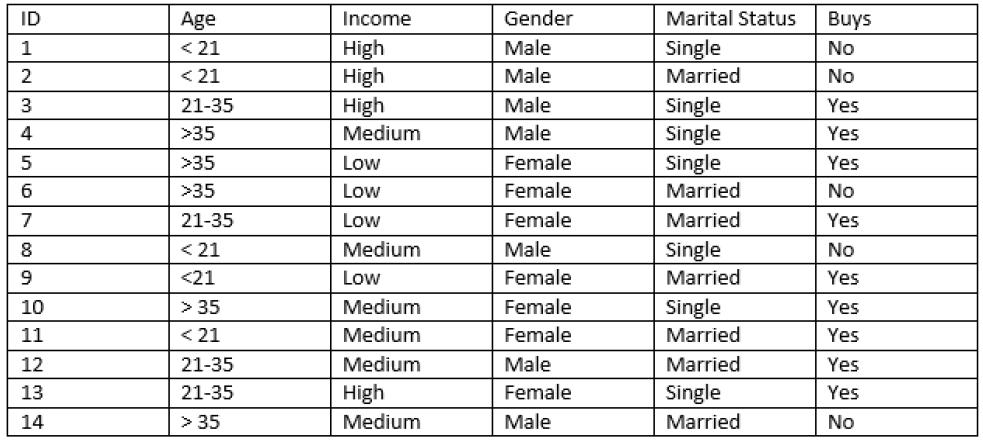

In given dataset independent attributes are age,income,gender,marital status.
Dependent attribute is Buys

Domain = { (Age[i],Income[i],Gender[i],Marital Status[i] } { 0<i<=14 }

Range = {Buys}

So task is to find mapping function which maps Domain to the range.Hence it is machine learning problem.

i.e to find function which take tuple of age ,income , gender and marital status as input give output as yes or no

    f(age,income,gender,marital status)=Yes     for some condition
                                       =No      for some condition


**Why Supervised learning?**

Given data accepts Domain { (Age[i],Income[i],Gender[i],Marital Status[i] } which is mapped with Output label Y(Buys).Supervised learning is about selecting function using distinct feature to label mapping.

Perception 

    In the given data (Domain)X contains 4 different features.
    

    X1 (Age) { X1 ∈ [<21,21-35,35>] }

    X2 (Income) { X2 ∈ [Low,Medium,High] }

    X3 (Gender) { X3 ∈ [Male,Female] }

    X4 (Marital Status) { X4 ∈ [Single,Married]}

    All values are categorical

    Output Label y=buys lipstick ∈ {yes,no}


**What is categorical data ?**

Categorical variable is a variable that can take on usually fixed number of possible values Categorical variables represent types of data which may be divided into groups, such that intersetion of those is a null set.

for eg. In dataset consider age can be seperated in 3 mutually exclusive sets : {<21,21-35, >35}

<21 ∩ <21-35 ∩ >31 = Φ

**Why Decision Tree ?** 

A decision tree classifier is a binary tree where predictions are made by traversing the tree from root to leaf — at each node, we go left if a feature is less than a threshold, right otherwise. Finally, each leaf is associated with a class, which is the output of the predictor.
Age can be classified into three classes ={<21 , 21-35 , >35 }

Income can be classified into={High , Medium , Low }

Gender can be classified into={Male , Female}

Marital status can be classified into={Single , Married }

As given data is categorical data and while finding output decisions are to be made we can use Decision Tree.

three types of nodes:

• A root node that has no incoming edges and zero or more outgoing
edges.

• Internal nodes, each of which has exactly one incoming edge and two
or more outgoing edges.

• Leaf or terminal nodes, each of which has exactly one incoming edge
and no outgoing edges.





**Programmer's Perspective** 

 Let S be our system

S = { s, e, X, Y , fme,ffi | phi}

    s (start state) = system take input of the data
    s is constructor of class i.e. system()

e (end state) = system predict output

    predict_output() function gives mapping of domain to range

X(Input Set) =  {X1,X2,X3,X4}

    X1 (Age) { X1 ∈ [<21,21-35,35>] , 0<X1<70}
  

    X2 (Income) { X2 ∈ [Low,Medium,High] , 
      0<X2<1000000
      0<Low<100000
      100000<=Medium<500000
      500000<=High<1000000
     }

    X3 (Gender) { X3 ∈ [Male,Female] }

    X4 (Marital Status) { X4 ∈ [Single,Married] }



Y(output set) = { Y0,Y1,Y2 }

    Y0 is result for whether customer buys or not buys the lipstick
    Y0 ∈ {Yes,No}

    Y1 is success

    Y2 is error occured in prediction 

fme -> main function which maps the Domain to Range and predicts the output whether customer buys or not.

    Domain (Rows of input data)
    ->    fme = create_decision_tree() 
    ->    Range (Yes or No ) output


ffi -> Friend Function

    ff0 - findsplit() 
          this function chooses the correct split
    
    ff1 - encodedata()
          this function parts the tree into left and right branch
    
    ff2 - buildtree()
          Builds the tree according to the splits
    
    ff3 - entropy()     




three types of nodes in Decision tree:

• A root node that has no incoming edges and zero or more outgoing edges.

• Internal nodes, each of which has exactly one incoming edge and two or more outgoing edges.

• Leaf or terminal nodes, each of which has exactly one incoming edge and no outgoing edges

Entropy - used to measure disorder or randomness

Mathematical formula is 

e(s) = -pi log₂(pi) 








Implementation by sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = {
    'age': ['<21', '<21', '21-35', '>35', '>35', '>35', '21-35', '<21', '<21', '>35', '<21', '21-35', '21-35', '>35'], 
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'gender':['male','male','male','male','female','female','female','male','female','female','female','male','female','male'],
    'marital_status':['single', 'married', 'single', 'single', 'single', 'married', 'married', 'single', 'married','single','married','married','single','married'],
    'buys':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
} 
df = pd.DataFrame.from_dict(data) 
df

,age,income,gender,marital_status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [3]:
X=df.iloc[:,[0,1,2,3]].values
y=df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder #to convert categorical values to integer values
encoder=LabelEncoder()
X_train[:,0]=encoder.fit_transform(X_train[:,0])
X_train[:,1]=encoder.fit_transform(X_train[:,1])
X_train[:,2]=encoder.fit_transform(X_train[:,2])
X_train[:,3]=encoder.fit_transform(X_train[:,3])
X_test[:,0]=encoder.fit_transform(X_test[:,0])
X_test[:,1]=encoder.fit_transform(X_test[:,1])
X_test[:,2]=encoder.fit_transform(X_test[:,2])
X_test[:,3]=encoder.fit_transform(X_test[:,3])

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
classifier.predict([[1,1,0,0]])              #test data Age < 21,Income = Low, Gender = Female, Marital Status = Married

array(['yes'], dtype=object)

In [9]:
y_pred

array(['no', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 3]])

In [11]:
accuracy_score(y_test,y_pred)

0.8

From Scratch

In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df



,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [14]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import threading
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Generating dataset
data = {
    'age': ['<21', '<21', '21-35', '>35', '>35', '>35', '21-35', '<21', '<21', '>35', '<21', '21-35', '21-35', '>35'], 
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'gender':['male','male','male','male','female','female','female','male','female','female','female','male','female','male'],
    'marital_status':['single', 'married', 'single', 'single', 'single', 'married', 'married', 'single', 'married','single','married','married','single','married'],
    'buys':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
} 
df = pd.DataFrame.from_dict(data) 
df

,age,income,gender,marital_status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [16]:
# Function to encode data with unique values > 2
def encode_data(df, target):
    '''
    params: {df, exclude}
    df: Input data
    target: name of the output label 
    
    returns: {df}
    df: One hot encoded data
    '''
    cat_cols = []
    for column in df.columns:
        if (df[column].dtype == "object") and (column != target): # Check if the column is categorical
            if len(df[column].unique()) > 2: # Check if number of unique values is greater than 2
                cat_cols.append(column)
                features = df[column].value_counts().index.tolist()
                # For every unique value create a new column
                for key in features:
                    col_name = f"{column}_{key}"
                    df[col_name] = 0
                    df.loc[df[column] == key, col_name] = 1
    df.drop(columns=cat_cols,inplace=True)
    return df

In [17]:
# Function for preprocessing given data
def preprocess_data(df):
    '''
    params: {df}
    df: Input data
    
    returns: {df}
    df: Preprocessed data
    '''
    df_encoded = encode_data(df, 'buys') # One hot encode the given data
    for col in df.columns:
        if (df[col].dtype == "object") and (len(df[col].unique()) == 2):
            # Map binary values with (0,1)
            unique_values = df[col].unique()
            df_encoded[col]=df_encoded[col].map({f'{unique_values[0]}':0, f'{unique_values[1]}':1})
            print(f"For column {col} class {unique_values[0]} maps to 0 and class {unique_values[1]} maps to 1")
    return df_encoded

In [18]:
df_encoded = preprocess_data(df.copy())

For column gender class male maps to 0 and class female maps to 1
For column marital_status class single maps to 0 and class married maps to 1
For column buys class no maps to 0 and class yes maps to 1


In [19]:
print("\nPreprocessed data: ")
print(df_encoded)


Preprocessed data: 
    gender  marital_status  buys  ...  income_medium  income_low  income_high
0        0               0     0  ...              0           0            1
1        0               1     0  ...              0           0            1
2        0               0     1  ...              0           0            1
3        0               0     1  ...              1           0            0
4        1               0     1  ...              0           1            0
5        1               1     0  ...              0           1            0
6        1               1     1  ...              0           1            0
7        0               0     0  ...              1           0            0
8        1               1     1  ...              0           1            0
9        1               0     1  ...              1           0            0
10       1               1     1  ...              1           0            0
11       0               1     1  ...      

In [20]:
# Function to calculate entropy of selected feature
def entropy(feature, data):
    '''
    params: {feature, data}
    feature: Name of feature
    data: Input data
    e(s) = -pi log pi
    used to measure disorder or randomness
    returns: {entropy}
    entropy: Entropy of the given feature
    '''
    weighted_entropy = 0
    if len(data) == 0:
        return 0
    else: total_count = len(data)
        
    unique_target_values = data['buys'].unique()
    unique_feature_values = data[feature].unique()
    for i in unique_feature_values:
        # For each unique value in selected feature
        entropy = 0
        feature_value_count = data[feature].value_counts()[i]
        for j in unique_target_values: 
            # For each unique value in target label
            count = len(data[(data[feature] == i) & (data['buys'] == j)])
            # Calculate probability of getting feature as i and target label as j
            if count == 0: continue
            probability = count/feature_value_count
            entropy = entropy + probability*np.log2(probability)
        feature_probability = feature_value_count/total_count
        weighted_entropy = weighted_entropy + feature_probability*entropy
    weighted_entropy = -weighted_entropy
    print(f'feature = {feature} - {weighted_entropy}')
    return weighted_entropy

In [21]:
# Function to calculate gini index of selected feature
def gini_index(feature, data):
    '''
    params: {feature, data}
    feature: Name of feature
    data: Input data
    
    returns: {gini_index}
    gini_index: Weighted gini index of the given feature
    '''
    gini_index = 0
    if len(data) == 0:
        return 0
    else: total_count = len(data)
        
    unique_target_values = data['buys'].unique()
    unique_feature_values = data[feature].unique()
    for j in unique_target_values: 
        # For each unique value in target label
        target_value_count = data['buys'].value_counts()[j]
        probability2_sum = 0
        for i in unique_feature_values:
            # For each unique value in selected feature
            count = len(data[(data[feature] == i) & (data['buys'] == j)])
            # Calculate probability of getting feature as i and target label as j
            probability = count/target_value_count
            probability2_sum = probability2_sum + probability**2
        # Calculate probability of getting target variable i
        target_probability = target_value_count/total_count
        # Calculate weighted gini index
        gini_index = gini_index + (1 - probability2_sum)*(target_probability)
    print(f'feature = {feature} - {gini_index}')
    return gini_index

In [22]:
# Function to determing the best split 
def find_best_split(features, data, metric):
    '''
    params: {feature, data, metric}
    feature: Name of feature
    data: Input data
    metric: Criteria for attribute selection
    
    returns: {best_feature}
    best_feature: Name of feature selected according to the metric
    '''
    
    print('Available features =', len(features))
    print('Number of datapoints =', len(data))
    best_feature = ''
    best_metric = 1
    # For each feature calculate the best feature by minimizing the selected metric value
    for feature in features:
        if metric=='gini':
            curr_criteria = gini(feature, data)
        elif metric=='entropy':
            curr_criteria = entropy(feature, data)
        if curr_criteria < best_metric:
            best_feature=feature
            best_metric=curr_criteria
            
    print(f'Best feature: {best_feature} with {metric} = {best_metric}')
    return best_feature

In [23]:
# Function to create a leaf node 
def create_leaf(data):
    '''
    params: {data}
    data: Input data
    
    returns: {leaf}
    leaf: dictonary defining terminating condition of tree
    '''
    # Initializing the leaf
    leaf = {'splitting_feature' : None,
            'left' : None,
            'right' : None,
            'is_leaf': True,
            'size': len(data)}
    # Setting leaf value
    target_value_counts = data['buys'].value_counts()
    target_unique_values = data['buys'].unique()
    predicted_value = target_unique_values[0]
    for i in target_unique_values:
        if target_value_counts[i] > target_value_counts[predicted_value]:
            predicted_value = i
    leaf['prediction'] = predicted_value
    return leaf 

In [24]:
# Function to check purity of the data
def check_purity(data):
    '''
    params: {data}
    data: Input data
    
    returns: {is_pure}
    is_pure: {True if purity has been achieved, else False}
    '''
    # A node having multiple classes is impure whereas a node having only one class is pure. 
    target_value_counts = data['buys'].value_counts()
    target_unique_values = data['buys'].unique()
    for i in target_unique_values:
        if target_value_counts[i] == 0:
            return True
    return False

In [25]:
# Recursive function to create the decision tree based on input data and parameters
def create_decision_tree(rem_features, data, curr_depth, metric, max_depth):
    '''
    params: {feature, data, curr_depth, metric, max_depth}
    feature: Name of feature
    data: Input data
    curr_depth: Current depth of the tree
    metric: Criteria for attribute selection
    max_depth: Maximum depth of the tree
    
    returns: {node}
    node: Dictionary representing the root node in the decision tree
    '''
    if rem_features == []:
        return create_leaf(data)
    
    if check_purity(data):
        return create_leaf(data)
    
    if curr_depth>=max_depth:
        return create_leaf(data)
    
    if len(data)<3:
        return create_leaf(data)
    
    # Select best feature for each level
    print('\nFor level', curr_depth)
    selected_feature = find_best_split(rem_features, data, metric)
    
    # Remove the selected best feature from the remaining features list
    rem_features.remove(selected_feature)
    left_split=data[data[selected_feature]==0]
    right_split=data[data[selected_feature]==1]
    
    # Check if all data points belong to the same class
    # Create a leaf node if the condition is true
    if len(left_split) == len(data):
        return create_leaf(left_split)
    
    if len(right_split) == len(data):
        return create_leaf(right_split)
    
    # Create decision tree for left split and right split
    left=create_decision_tree(rem_features, left_split, curr_depth+1, metric, max_depth)
    right=create_decision_tree(rem_features, right_split, curr_depth+1, metric, max_depth)
    
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': selected_feature,
            'left'             : left, 
            'right'            : right,
            'size'             : len(data)}

In [26]:
# Function to print the decision tree
def print_tree(tree, level, store):
    '''
    params: {tree, level, store}
    tree: Decision tree to be printed
    level: Starting level of the decision tree
    store: Dictionary storing traversed decision tree
    
    returns: None
    '''
    if not tree:
        return
    split_name = tree['splitting_feature']
    dashes='-'*level*3
    
    string=''
    if tree['is_leaf']==False:
        print(dashes, store)
    else:
        if tree['size']>0:
            print(dashes, store, " PREDICTION: ", tree['prediction'], 'size=', tree['size'])
    
    left_store=store.copy()
    left_store[split_name]=0
    print_tree(tree['left'], level+1, left_store)
    
    right_store=store.copy()
    right_store[split_name]=1
    print_tree(tree['right'], level+1, right_store)
    

In [27]:
def build_tree(df_encoded, max_depth, metric):
    '''
    params: {df_encoded, max_depth, metric}
    df_encoded: Encoded and preprocessed input data
    metric: Criteria for attribute selection
    max_depth: Maximum depth of the tree
    
    returns: None
    '''
    features = list(df_encoded.columns)
    features.remove('buys')
    decision_tree=create_decision_tree(features, df_encoded, 0, metric, max_depth)
    print(f"\nDecision Tree:\nSelected criteria: {metric}\nMax depth: {max_depth}\n---------")
    print_tree(decision_tree, 0, {})
    return decision_tree

In [28]:
metric =  'entropy'
max_depth = 3

decision_tree = build_tree(df_encoded, max_depth, metric)


For level 0
Available features = 8
Number of datapoints = 14
feature = gender - 0.7884504573082896
feature = marital_status - 0.9241743523004413
feature = age_>35 - 0.9371011056259821
feature = age_<21 - 0.8380423950607804
feature = age_21-35 - 0.7142857142857143
feature = income_medium - 0.9389462162661897
feature = income_low - 0.9253298887416583
feature = income_high - 0.9152077851647805
Best feature: age_21-35 with entropy = 0.7142857142857143

For level 1
Available features = 7
Number of datapoints = 10
feature = gender - 0.7219280948873623
feature = marital_status - 0.9709505944546686
feature = age_>35 - 0.9709505944546686
feature = age_<21 - 0.9709505944546686
feature = income_medium - 0.9709505944546686
feature = income_low - 0.965148445440323
feature = income_high - 0.763547202339972
Best feature: gender with entropy = 0.7219280948873623

For level 2
Available features = 6
Number of datapoints = 5
feature = marital_status - 0.5509775004326937
feature = age_>35 - 0.4
feature =

In [29]:
# Function to perform prediction using decision tree on input values
def predict(tree, X):
    '''
    params: {tree, X}
    tree: Decision tree using which prediction is to be performed
    X: Input value for which prediction is to be performed
    
    returns: {prediction}
    prediction: {yes, no}
    '''
    if tree['is_leaf']:
        if (tree['prediction']==0):
            return "no"
        return "yes"
    else:
        split_feature_value = X[tree['splitting_feature']]
        if split_feature_value == 0:
            return predict(tree['left'], X)
        else:
            return predict(tree['right'], X)

In [39]:
# Function to take input values from the user
def get_data(input_columns):
    input_dict = {}
    flag = True
    while flag:
        age = int(input('''Enter age'''))
        if age <=0 or age>70:
            print("Please enter correct age!")
        else:
            if age < 21:
                input_dict['age_<21'] = 1
            elif age >21 and age<35:
                input_dict['age_21-35'] = 1
            elif age > 35:
                input_dict['age_>35'] = 1
            flag = False
    
    flag = True
    while flag:
        income = int(input('''Enter income'''))
        if income <=0 or income>1000000:
            print("Please enter a valid income!")
        else:
            if income < 100000:
                input_dict['income_low'] = 1
            elif income >= 100000 and income<500000:
                input_dict['income_medium'] = 1
            elif income >= 500000:
                input_dict['income_high'] = 1
            flag = False
    
    flag = True        
    while flag:
        marital_status = input('Are you married(y,n): ')
        if marital_status.lower() not in ['y','n']:
            print("Please answer the question with: (y/n)!")
        else:
            if marital_status.lower() == 'y':
                input_dict['marital_status'] = 1
            else:
                input_dict['marital_status'] = 0
            flag = False
    
    flag = True
    while flag:
        gender = int(input('''
Select gender category:
1. male
2. female
        '''))
        if gender not in [1,2]:
            print("Please select a valid gender category!")
        else:
            if gender == 1:
                input_dict['gender'] = 0
            elif gender == 2:
                input_dict['gender'] = 1
            flag = False
    
    print("Provided input: ", input_dict)
    for col in input_columns:
        if col not in input_dict:
            input_dict[col] = 0
    return input_dict

In [40]:
columns = df_encoded.drop(columns=['buys']).columns
x = get_data(columns)
input_val = x.copy()
x = pd.Series(x)
print("Prediction: ",predict(decision_tree, x)) 

Enter age75
Please enter correct age!
Enter age40
Enter income10000000
Please enter a valid income!
Enter income600000
Are you married(y,n): y

Select gender category:
1. male
2. female
        1
Provided input:  {'age_>35': 1, 'income_high': 1, 'marital_status': 1, 'gender': 0}
Prediction:  yes


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8